### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [5]:
import pandas as pd
car_model = pd.read_csv(r'D:\Projects\GL\Residency 4\vehicle.csv')
new_car_model = car_model.dropna(axis = 0 , how = 'any')
new_car_model.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [7]:
new_car_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
count = new_car_model['class'].value_counts()
count

car    413
bus    205
van    195
Name: class, dtype: int64

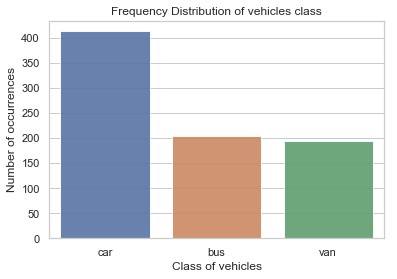

In [13]:
sns.set(style="whitegrid")
sns.barplot(count.index, count.values, alpha=0.9)
plt.title('Frequency Distribution of vehicles class')
plt.ylabel('Number of occurrences', fontsize=12)
plt.xlabel('Class of vehicles', fontsize=12)
plt.show()

### Check for any missing values in the data 

In [10]:
new_car_model1 = new_car_model.drop('class', axis=1)

In [11]:
class_median=np.median(new_car_model1)
class_median

89.0

In [12]:
new_car_model.replace(to_replace = 0, value =class_median).head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [13]:
from scipy.stats import zscore
new_car_model_attr = new_car_model.loc[:,'compactness':'hollows_ratio']
new_car_model_z = new_car_model_attr.apply(zscore)

In [14]:
new_car_model_z.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### K - Means Clustering

### Assign a dummy array called Cluster_error

In [15]:
cluster_errors=[]

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [17]:
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(new_car_model_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( {"num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2.917617e+07
1,2,6.905477e+06
2,3,4.610991e+06
3,4,3.333252e+06
4,5,2.288297e+06
5,6,1.823916e+06
6,7,1.601418e+06
7,8,1.466415e+06
8,9,1.305235e+06


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

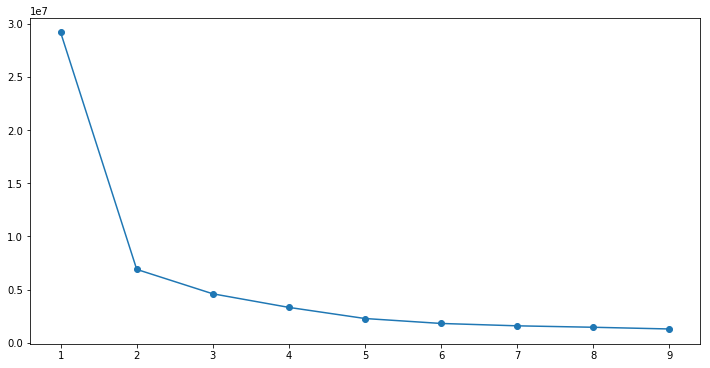

In [18]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

In [19]:
cluster = KMeans(n_clusters = 3, random_state = 2354 )
cluster.fit(new_car_model_z)
new_car_model_zcopy = new_car_model_z.copy(deep = True)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [20]:
centroids = cluster.cluster_centers_
centroids

array([[-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299],
       [ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466]])

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [21]:

centroid_df = pd.DataFrame(centroids, columns = list(new_car_model_z) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973
1,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801
2,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695


Hint: Use pd.Dataframe function 

In [22]:
prediction=cluster.predict(new_car_model_z)
new_car_model_z["GROUP"] = prediction

### Use kmeans.labels_ function to print out the labels of the classes

In [23]:

cluster.labels_

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2,
       0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 2,

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000168116DCBA8>,
      dtype=object)

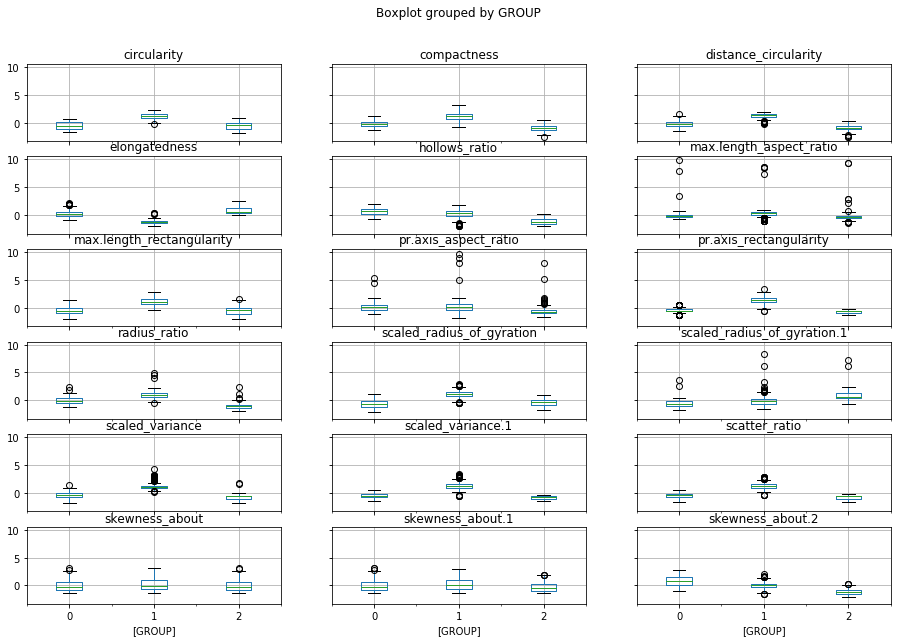

In [24]:

import matplotlib.pylab as plt
new_car_model_z.boxplot(by = 'GROUP',  layout=(6,3), figsize=(15, 10))

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [26]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [27]:
df1=pd.DataFrame(a)
df2=pd.DataFrame(b)
df3=pd.DataFrame(c)

In [28]:
data=[df1,df2,df3]
data

[            0         1
 0   13.882785  4.438501
 1   11.687256  1.250981
 2   10.316397  1.449346
 3    9.837412 -2.041974
 4    8.691601 -4.289773
 5    9.824164  1.444590
 6    9.216889  0.960682
 7   10.199509 -2.480899
 8   12.813390 -1.256776
 9   13.841511  4.209154
 10  12.565569 -0.820998
 11   6.550742 -2.178250
 12  10.360369 -0.563363
 13  10.430790  0.155401
 14  11.008313  1.417300
 15  11.154466  0.900240
 16   8.448394 -0.296867
 17   9.570574 -2.117886
 18  12.364814 -1.756535
 19  12.890359 -1.184771
 20   9.136206 -1.975383
 21   8.716328 -2.078101
 22  10.953541  2.002577
 23  10.817454 -0.584992
 24  11.633308  4.434253
 25   8.691852 -1.099665
 26   9.536658  0.657788
 27  11.976719  0.189915
 28  11.399653 -3.204028
 29   9.520514 -2.567973
 ..        ...       ...
 70  11.255897  0.052032
 71  10.827571 -0.951178
 72   9.029626 -0.368484
 73  10.645805  0.468738
 74  11.819408 -3.607199
 75   6.903931 -0.540510
 76  11.974266  1.643859
 77   9.616754  1.230841


### 10. Use scatter matrix to print all the 3 distributions

In [34]:
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(data)


AttributeError: 'list' object has no attribute '_get_numeric_data'

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [51]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='ward')

In [50]:
model.fit(data)

ValueError: cannot copy sequence with size 100 to array axis with dimension 2

### 12. Plot the dendrogram for the consolidated dataframe

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 